<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/Deep_learning_using_Iris_dataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data and transform Data

In [11]:
import pandas as pd
path = "/content/Iris.csv"
DataSet = pd.read_csv(path).dropna()

In [12]:
DataSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [14]:
DataSet['SepalLengthCm'] = DataSet['SepalLengthCm']/10
DataSet['SepalWidthCm'] = DataSet['SepalWidthCm']/10
DataSet['PetalLengthCm'] = DataSet['PetalLengthCm']/10

for i in range(1,5):
    DataSet = DataSet.append(DataSet)

DataSet.describe()

sample = DataSet.sample(10)
sample

Iris_class = ['setosa', 'virginica', 'versicolor']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in DataSet.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',Iris_class[int(row[-1])])

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'] SpeciesName
[ 106.0 0.076 0.03 0.06599999999999999 2 ] versicolor
[ 28.0 0.052000000000000005 0.034999999999999996 0.015 0 ] setosa
[ 95.0 0.055999999999999994 0.027000000000000003 0.042 1 ] virginica
[ 131.0 0.074 0.027999999999999997 0.061 1 ] versicolor
[ 55.0 0.065 0.027999999999999997 0.046 1 ] virginica
[ 54.0 0.05500000000000001 0.023 0.04 1 ] virginica
[ 89.0 0.055999999999999994 0.03 0.040999999999999995 1 ] virginica
[ 88.0 0.063 0.023 0.044000000000000004 1 ] virginica
[ 29.0 0.052000000000000005 0.033999999999999996 0.013999999999999999 0 ] setosa
[ 137.0 0.063 0.033999999999999996 0.055999999999999994 2 ] versicolor


Split Training and testing Data

In [15]:
from sklearn.model_selection import train_test_split

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
labels = 'Species'

x,y = DataSet[feature].values , DataSet[labels].values

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30 , random_state=0)

print('train count', x_train.shape[0], '\n' , 'test count', x_test.shape[0])


train count 26880 
 test count 11520


**Import tensorflow**

In [16]:
!pip install --upgrade tensorflow

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

In [18]:
# Set random seed for reproducability
tf.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tf.__version__)

Libraries imported.
Keras version: 2.8.0
TensorFlow version: 2.8.0


In [19]:
#set data type float
x_train  = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')

Ready...


## Neural network

In [22]:
h1 = 10

#level 1 weight =  length of features x h1
#level 2 weight =10 x 10
#level 3 weight = 10 x 3
model = Sequential()
model.add(Dense(h1, input_dim = len(feature), activation='relu'))
model.add(Dense(h1, input_dim = h1, activation='relu'))
model.add(Dense(len(Iris_class), input_dim = h1, activation='softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2688/2688 [==============================] - 6s 2ms/step - loss: 0.3243 - accuracy: 0.8798 - val_loss: 0.1232 - val_accuracy: 0.9586
Epoch 2/50
2688/2688 [==============================] - 6s 2ms/step - loss: 0.1125 - accuracy: 0.9590 - val_loss: 0.1136 - val_accuracy: 0.9586
Epoch 3/50
2688/2688 [==============================] - 6s 2ms/step - loss: 0.1071 - accuracy: 0.9596 - val_loss: 0.1111 - val_accuracy: 0.9586
Epoch 4/50
2688/2688 [==============================] - 7s 3ms/step - loss: 0.1048 - accuracy: 0.9599 - val_loss: 0.1055 - val_accuracy: 0.9586
Epoch 5/50
2688/2688 [==============================] - 6s 2ms/step - loss: 0.1029 - accuracy: 0.9603 - val_loss: 0.1027 - val_accuracy: 0.9586
Epoch 6/50
2688/2688 [==============================] - 5s 2ms/step - loss: 0.1007 - accuracy: 0.9603 - val_loss: 0.1008 - val_accuracy: 0.9586
Epoch 7/50
2688/2688 [==============================] - 6s 2ms/step - loss: 0.0994 - accuracy: 0.9609 - val_loss: 0.1011 - val_accuracy: 0.9583
Epo

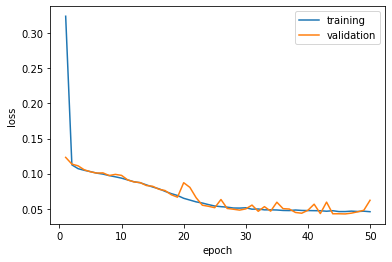

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [25]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.76332515  0.21756291 -0.62591016  0.10297035  1.462063   -0.36591646
   1.0592167  -0.29799902 -0.35769516 -1.0972143 ]
 [-3.5527735   0.3755176  -0.6403892  -3.9012547   3.5589592  -3.9422626
   3.4756806  -3.8266895   0.5428302  -4.1031156 ]
 [ 4.188578   -0.2043052   0.30341795  4.498994   -3.3891118   4.5879016
  -2.9588602   4.509561   -0.0636822   4.6627617 ]
 [ 0.05131055 -0.62259984  0.07935909  0.30148005  0.24184918  0.4079937
   0.72899544  0.8563242  -0.18527776  0.3261674 ]] 
Biases:
 [-0.08740044  0.         -0.15620933 -0.07553909  0.67340356 -0.09400267
  0.1511992  -0.26471773  0.         -0.06389883]
------------
Weights:
 [[-0.4895427  -0.34042776  0.46071115 -0.55263096  3.988368    0.10352981
   4.952001   -4.8331466  -5.200517    0.3494907 ]
 [-0.42790762  0.4142859   0.28268427 -0.33801395 -0.02485991  0.32932627
  -0.22083947 -0.17231965 -0.28950223  0.17770809]
 [ 0.05818039 -0.33661288 -0.2941931  -0.12000748 -0.2748465  -0.31182128

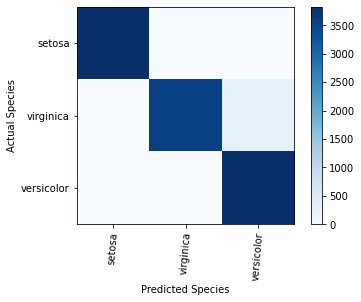

In [26]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(Iris_class))
plt.xticks(tick_marks, Iris_class, rotation=85)
plt.yticks(tick_marks, Iris_class)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

In [28]:
 #Save the trained model
modelFileName = 'models/iris-classifier'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

INFO:tensorflow:Assets written to: models/iris-classifier/assets
model saved as models/iris-classifier


In [29]:
# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(Iris_class[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
virginica
